In [160]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph langchain_google_genai serpapi tavily-python langchain_community langchain_groq

In [161]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')


In [191]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KET')
SERPER_API_KEY = userdata.get('SERPER_API_KEY')

In [193]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

In [217]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="gemma2-9b-it",
    max_retries=2,
    api_key=groq_api_key
)

llm.invoke("greet me")

AIMessage(content='Hello! 👋  \n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 7.488e-05, 'queue_time': 0.023381279, 'total_time': 0.029165789}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-85425d2e-3cd6-4383-8cd9-a5ee7c4c977a-0', usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27})

In [146]:
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# from langchain_google_genai import ChatGoogleGenerativeAI
# llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=google_api_key)
# messages = [HumanMessage(content="What is your name?")]
# result = llm.invoke(messages)
# print(result)


content="I don't have a name. I am a large language model, trained by Google." additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-8404c701-7bf2-4d8e-9595-20632a226146-0' usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}}


In [29]:
# from langgraph.graph import MessagesState
# from typing import TypedDict, List, Annotated, Union
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# import operator
# class AgentState(TypedDict):
#     messages: Annotated[List[Union[HumanMessage, AIMessage, SystemMessage]], operator.add]
#     # budget: float
#     # interests: List[str]
#     # companions: int
#     # city: str
#     # days: int
#     # travel_date: str
#     # itinerary: List[dict]  # To store the final itinerary


In [218]:
from langgraph.graph import MessagesState
from typing import TypedDict, List, Annotated, Union
class AgentState(MessagesState):
    # pass
    # messages: Annotated[List[Union[HumanMessage, AIMessage, SystemMessage]], operator.add]
    budget: float
    interests: List[str]
    companions: int
    city: str
    days: int
    travel_date: str
    itinerary: List[dict]  # To store the final itinerary


In [219]:
def get_system_prompt(state: AgentState):
    return f"""You are a smart travel assistant. Create a detailed itinerary considering:
    - Budget: ${state['budget']}
    - Travel Interests: {', '.join(state['interests'])}
    - Companions: {state['companions']} people
    - Destination: {state['city']}
    - Duration: {state['days']} days
    - Travel Date: {state['travel_date']}

    Include daily:
    - Hotels with prices and links (if possible)
    - Transportation options
    - Food recommendations
    - Activities with costs
    - Total estimated daily cost
    Provide hotel logos when possible."""


In [220]:
from langchain_core.tools import tool

from typing import Optional

from pydantic import BaseModel, Field
import serpapi
# from langchain.pydantic_v1 import BaseModel, Field
from langchain_core.tools import tool

class HotelsInput(BaseModel):
    q: str = Field(description='Location of the hotel')
    check_in_date: str = Field(description='Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22')
    check_out_date: str = Field(description='Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28')
    sort_by: Optional[str] = Field(8, description='Parameter is used for sorting the results. Default is sort by highest rating')
    adults: Optional[int] = Field(1, description='Number of adults. Default to 1.')
    children: Optional[int] = Field(0, description='Number of children. Default to 0.')
    rooms: Optional[int] = Field(1, description='Number of rooms. Default to 1.')
    hotel_class: Optional[str] = Field(
        None, description='Parameter defines to include only certain hotel class in the results. for example- 2,3,4')


class HotelsInputSchema(BaseModel):
    params: HotelsInput


@tool(args_schema=HotelsInputSchema)
def hotels_finder(params: HotelsInput):
    '''
    Find hotels using the Google Hotels engine.

    Returns:
        dict: Hotel search results.
    '''

    params = {
        'api_key': "89882048191781d4b9f405560392e04833e46d69",
        'engine': 'google_hotels',
        'hl': 'en',
        'gl': 'us',
        'q': params.q,
        'check_in_date': params.check_in_date,
        'check_out_date': params.check_out_date,
        'currency': 'USD',
        'adults': params.adults,
        'children': params.children,
        'rooms': params.rooms,
        'sort_by': params.sort_by,
        'hotel_class': params.hotel_class
    }

    search = serpapi.search(params)
    results = search.data
    return results['properties'][:5]




In [16]:
# from langchain_google_genai import ChatGoogleGenerativeAI

# def multiply(a: int, b: int) -> int:
#     """Multiply a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a * b

# # This will be a tool
# def add(a: int, b: int) -> int:
#     """Adds a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a + b

# def divide(a: int, b: int) -> float:
#     """Divide a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a / b

# tools = [add, multiply, divide]
# llm_with_tools = llm.bind_tools(tools)

In [221]:
# from langchain_community.tools.tavily_search import TavilySearchResults
# from pydantic import BaseModel



# tool = TavilySearchResults(max_results=2)
tools = [hotels_finder]
llm_with_tools = llm.bind_tools(tools)

In [222]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e045322bbd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e04531fa310>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'hotels_finder', 'description': 'Find hotels using the Google Hotels engine.\n\nReturns:\n    dict: Hotel search results.', 'parameters': {'properties': {'params': {'properties': {'q': {'description': 'Location of the hotel', 'type': 'string'}, 'check_in_date': {'description': 'Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22', 'type': 'string'}, 'check_out_date': {'description': 'Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28', 'type': 'string'}, 'sort_by': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': 8, 'description': 'Parameter is used for sorting the results. Default is sort by highest rating'}, 'adults': {'any

In [223]:
llm_with_tools.kwargs

{'tools': [{'type': 'function',
   'function': {'name': 'hotels_finder',
    'description': 'Find hotels using the Google Hotels engine.\n\nReturns:\n    dict: Hotel search results.',
    'parameters': {'properties': {'params': {'properties': {'q': {'description': 'Location of the hotel',
         'type': 'string'},
        'check_in_date': {'description': 'Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22',
         'type': 'string'},
        'check_out_date': {'description': 'Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28',
         'type': 'string'},
        'sort_by': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
         'default': 8,
         'description': 'Parameter is used for sorting the results. Default is sort by highest rating'},
        'adults': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
         'default': 1,
         'description': 'Number of adults. Default to 1.'},
        'children': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
  

In [224]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
import datetime
import operator

CURRENT_YEAR = datetime.datetime.now().year

# sys_msg = SystemMessage(content=get_system_prompt(state))
def assistant(state: AgentState)->AgentState:
    system_prompt = SystemMessage(content=get_system_prompt(state))
    # messages = [system_prompt] + state['messages']
    # # messages = state['messages']
    # response = llm_with_tools.invoke(messages)
    # # response = llm.invoke(messages)
    # return {"messages": [response]}
    print("state",[system_prompt] + state["messages"])
    return {"messages": [llm_with_tools.invoke([system_prompt] + state["messages"])]}


# # Node
# def assistant(state: AgentState) -> AgentState:
#    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

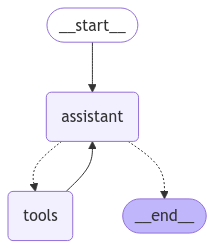

In [225]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph

# Graph
builder: StateGraph = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph: CompiledStateGraph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [20]:
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# from langgraph.prebuilt import tools_condition, ToolNode
# from langgraph.graph import StateGraph, END ,START
# from IPython.display import display, Image
# from langgraph.checkpoint.memory import MemorySaver
# from langgraph.graph.state import CompiledStateGraph
# from langgraph.graph import MessagesState

# def assistant(state: MessagesState)->MessagesState:
#     # system_prompt = SystemMessage(content=get_system_prompt(state))
#     # messages = [system_prompt] + state['messages']
#     messages = state['messages']
#     response = llm_with_tools.invoke(messages)
#     # response = llm.invoke(messages)
#     return {"messages": [response]}

# # # New itinerary creation node
# # def create_itinerary(state: AgentState):
# #     # Parse tool responses and format itinerary
# #     itinerary = []
# #     tool_results = [msg.content for msg in state['messages'] if isinstance(msg, ToolMessage)]

# #     # Create structured itinerary (simplified example)
# #     itinerary_entry = {
# #         "city": state['city'],
# #         "days": state['days'],
# #         "daily_plan": [],
# #         "total_estimated_cost": state['budget']
# #     }

# #     # Add parsed tool data to itinerary
# #     for result in tool_results:
# #         if 'hotels' in result:
# #             itinerary_entry['hotels'] = result['hotels'][:3]  # Top 3 hotels

# #     return {"itinerary": [itinerary_entry], "messages": [AIMessage(content="Itinerary created!")]}

# # Modified graph construction
# builder = StateGraph(MessagesState)
# builder.add_node("assistant", assistant)
# builder.add_node("tools", ToolNode([tools]))  # Add other tools as needed
# # builder.add_node("create_itinerary", create_itinerary)

# # Edge connections
# builder.add_edge(START, "assistant")
# builder.add_conditional_edges(
#     "assistant",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# # builder.add_conditional_edges(
# #     "assistant",
# #     tools_condition,
# #     {
# #         "call_tools": "tools",
# #         "continue": "create_itinerary"
# #     }
# # )
# builder.add_edge("tools", "assistant")




# memory: MemorySaver = MemorySaver()
# graph: CompiledStateGraph = builder.compile( checkpointer=memory)

# # Show
# display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


ValueError: The first argument must be a string or a callable with a __name__ for tool decorator. Got <class 'list'>

In [226]:
initial_state = {
    "messages": [HumanMessage(content="Plan my trip to Pakistan")],
    "budget": 5000.0,
    "interests": ["sightseeing", "local cuisine"],
    "companions": 2,
    "city": "Skardu",
    "days": 7,
    "travel_date": "2025-10-03",
    "itinerary": []
}


In [227]:
config1 = {"configurable": {"thread_id": "1"}}

In [228]:
# Specify an input
# messages = [HumanMessage(content="Plan my trip to Pakistan")]

# Run
messages = react_graph.invoke(initial_state,config1)
print("\n[FINAL RESPONSE]\n",messages)
for m in messages['messages']:
    m.pretty_print()

state [SystemMessage(content='You are a smart travel assistant. Create a detailed itinerary considering:\n    - Budget: $5000.0\n    - Travel Interests: sightseeing, local cuisine\n    - Companions: 2 people\n    - Destination: Skardu\n    - Duration: 7 days\n    - Travel Date: 2025-10-03\n\n    Include daily:\n    - Hotels with prices and links (if possible)\n    - Transportation options\n    - Food recommendations\n    - Activities with costs\n    - Total estimated daily cost\n    Provide hotel logos when possible.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='fd48c17b-bf82-47ae-8fe5-a398c1165b5b')]


/usr/local/lib/python3.11/dist-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `str` but got `int` with value `8` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


state [SystemMessage(content='You are a smart travel assistant. Create a detailed itinerary considering:\n    - Budget: $5000.0\n    - Travel Interests: sightseeing, local cuisine\n    - Companions: 2 people\n    - Destination: Skardu\n    - Duration: 7 days\n    - Travel Date: 2025-10-03\n\n    Include daily:\n    - Hotels with prices and links (if possible)\n    - Transportation options\n    - Food recommendations\n    - Activities with costs\n    - Total estimated daily cost\n    Provide hotel logos when possible.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='fd48c17b-bf82-47ae-8fe5-a398c1165b5b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wzjq', 'function': {'arguments': '{"params":{"q":"Skardu","check_in_date":"2025-10-03","check_out_date":"2025-10-09","adults":2,"rooms":1}}', 'name': 'hotels_finder'}, 'type': 'function'}]}, response_metadata={'token_usage':

/usr/local/lib/python3.11/dist-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `str` but got `int` with value `8` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


state [SystemMessage(content='You are a smart travel assistant. Create a detailed itinerary considering:\n    - Budget: $5000.0\n    - Travel Interests: sightseeing, local cuisine\n    - Companions: 2 people\n    - Destination: Skardu\n    - Duration: 7 days\n    - Travel Date: 2025-10-03\n\n    Include daily:\n    - Hotels with prices and links (if possible)\n    - Transportation options\n    - Food recommendations\n    - Activities with costs\n    - Total estimated daily cost\n    Provide hotel logos when possible.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='fd48c17b-bf82-47ae-8fe5-a398c1165b5b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wzjq', 'function': {'arguments': '{"params":{"q":"Skardu","check_in_date":"2025-10-03","check_out_date":"2025-10-09","adults":2,"rooms":1}}', 'name': 'hotels_finder'}, 'type': 'function'}]}, response_metadata={'token_usage':

/usr/local/lib/python3.11/dist-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `str` but got `int` with value `8` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


state [SystemMessage(content='You are a smart travel assistant. Create a detailed itinerary considering:\n    - Budget: $5000.0\n    - Travel Interests: sightseeing, local cuisine\n    - Companions: 2 people\n    - Destination: Skardu\n    - Duration: 7 days\n    - Travel Date: 2025-10-03\n\n    Include daily:\n    - Hotels with prices and links (if possible)\n    - Transportation options\n    - Food recommendations\n    - Activities with costs\n    - Total estimated daily cost\n    Provide hotel logos when possible.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='fd48c17b-bf82-47ae-8fe5-a398c1165b5b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wzjq', 'function': {'arguments': '{"params":{"q":"Skardu","check_in_date":"2025-10-03","check_out_date":"2025-10-09","adults":2,"rooms":1}}', 'name': 'hotels_finder'}, 'type': 'function'}]}, response_metadata={'token_usage':

In [ ]:
messages = graph.invoke({"messages": messages},config1)
for m in messages['messages']:
    m.pretty_print()

In [28]:
result = graph.invoke(
    initial_state,
    config1
)

ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x79cc890d4e10>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 128, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 101, in _retrieve_info
    info = _metadata.get_service_account_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 323, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 248, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http:

KeyboardInterrupt: 